In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLDL/Progetto/BiseNetv1
!pip install tensorboardX

Mounted at /content/drive
/content/drive/MyDrive/MLDL/Progetto/BiseNetv1


In [ ]:
!python train.py

epoch 0, lr 0.025000: 100% 500/500 [14:49<00:00,  1.78s/it, loss=1.350528]
loss for train : 2.587890
epoch 1, lr 0.024550: 100% 500/500 [11:16<00:00,  1.35s/it, loss=1.408606]
loss for train : 1.438000
epoch 2, lr 0.024098: 100% 500/500 [11:11<00:00,  1.34s/it, loss=1.158063]
loss for train : 1.187436
epoch 3, lr 0.023646:  63% 316/500 [07:03<04:05,  1.34s/it, loss=0.983792]

In [ ]:
import torch

print(torch.cuda.get_device_name(0))

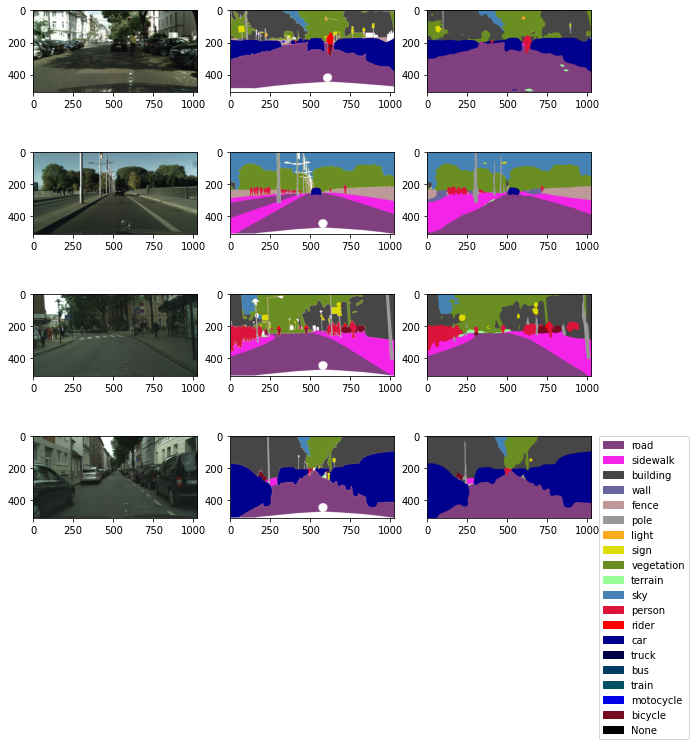

In [2]:
from dataset.Cityscapes import Cityscapes
from torch.utils.data import DataLoader
import torch
from model.build_BiSeNet import BiSeNet
from utils import denormalize_image, format_image_print, format_label_print
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

batch_size = 4
dataset_train = Cityscapes('../Cityscapes', 'val', [512, 1024])
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
img_batch, lbl_batch = next(iter(dataloader_train))

model = BiSeNet(19, "resnet101")
model.load_state_dict(torch.load('checkpoints_101_sgd/latest_dice_loss.pth'))
model.eval()

a = (np.array(dataset_train.palette).reshape(20,3)) / 255
b = np.ones((20,1))
c = np.hstack((a,b)).tolist()
colors = [tuple(row) for row in c]
patches = [ mpatches.Patch(color=colors[i], label=dataset_train.labels[i]) for i in range(20)]

with torch.no_grad():
    fig, axarr = plt.subplots(batch_size, 3, figsize=(10,10))
    img_batch_denorm = denormalize_image(img_batch, dataset_train.mean, dataset_train.std)
    # modello è trainato su dati non normalizzati, quando traino con dati
    # normalizzati, devo fare previsione su dati non denormalizzati
    pred_batch = model(img_batch_denorm)
    pred_lbl_batch = torch.argmax(pred_batch, dim=1)
    for idx in range(batch_size):
        img = img_batch_denorm[idx]
        lbl = lbl_batch[idx]
        pred = pred_lbl_batch[idx]

        # quando stampo, devo prima denormalizzare
        axarr[idx,0].imshow(format_image_print(img))
        axarr[idx,1].imshow(format_label_print(lbl, dataset_train.palette))
        axarr[idx,2].imshow(format_label_print(pred, dataset_train.palette))

        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )